In [5]:
import numpy as np
import awkward as ak
import uproot

import hist
from topcoffea.modules.histEFT import HistEFT
import topcoffea.modules.utils as utils

import mplhep as hep
import matplotlib.pyplot as plt
import os

In [2]:
hep.style.use("CMS")
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize':20, 
          'lines.markersize':5}
plt.rcParams.update(params)

In [41]:
wc_lst = utils.get_list_of_wc_names("/cms/cephfs/data/store/user/hnelson2/tW_EFT/nanoGen/fixed_rwgts/NanoGen_tW_OGstpt/nanoGen_365.root")
wc_lst

['cHtbRe',
 'ctGRe',
 'ctGIm',
 'cHQ3',
 'cbWRe',
 'cQl3',
 'cleQt3Re',
 'ctWRe',
 'cleQt1Re']

# Event Weight Plots

In [3]:
hists_orig = utils.get_hist_from_pkl("../tW_orig_eventweights.pkl.gz", allow_empty=False)
hists_small = utils.get_hist_from_pkl("../tW_small_eventweights.pkl.gz", allow_empty=False)
hists_medium = utils.get_hist_from_pkl("../tW_medium_eventweights.pkl.gz", allow_empty=False)
hists_large = utils.get_hist_from_pkl("../tW_large_eventweights.pkl.gz", allow_empty=False)

In [4]:
print(hists_orig)

{'weights_SM': Hist(Regular(20, -10, 10, name='weights_SM', label='event weights at the SM'), storage=Weight()) # Sum: WeightedSum(value=100000, variance=100000), 'weights_SM_log': Hist(Regular(70, -6, 2, name='weights_SM_log', label='log(event weights at the SM)'), storage=Weight()) # Sum: WeightedSum(value=63696, variance=63696) (WeightedSum(value=100000, variance=100000) with flow), 'weights_pt1_log': Hist(Regular(70, -6, 2, name='weights_pt1_log', label='log(event weights at the pt1)'), storage=Weight()) # Sum: WeightedSum(value=99999, variance=99999) (WeightedSum(value=100000, variance=100000) with flow), 'weights_pt2_log': Hist(Regular(70, -6, 2, name='weights_pt2_log', label='log(event weights at the pt2)'), storage=Weight()) # Sum: WeightedSum(value=100000, variance=100000), 'weights_pt3_log': Hist(Regular(70, -6, 2, name='weights_pt3_log', label='log(event weights at the pt3)'), storage=Weight()) # Sum: WeightedSum(value=99998, variance=99998) (WeightedSum(value=100000, varian

In [7]:
outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/event_weights"

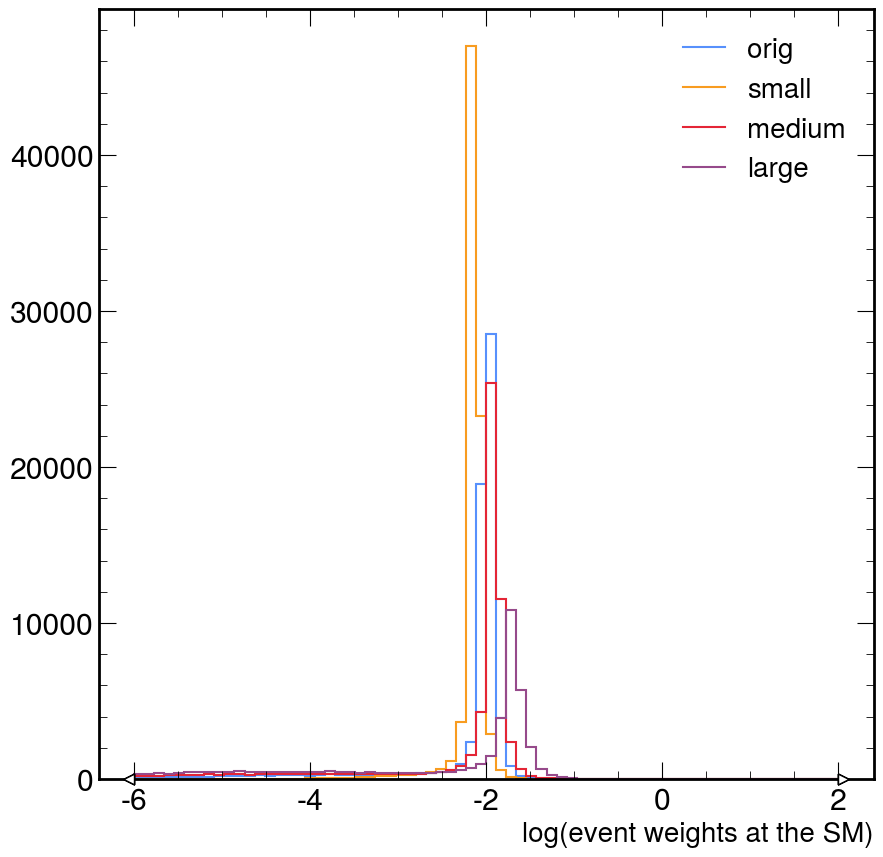

In [8]:
key = 'weights_SM_log'
fig, ax = plt.subplots()
hists_orig[key].plot1d(ax=ax, stack=False, yerr=False, label="orig")
hists_small[key].plot1d(ax=ax, stack=False, yerr=False, label="small")
hists_medium[key].plot1d(ax=ax, stack=False, yerr=False, label="medium")
hists_large[key].plot1d(ax=ax, stack=False, yerr=False, label="large")
ax.legend(loc='upper right')

fig.savefig(os.path.join(outpath, f"{key}.pdf"))

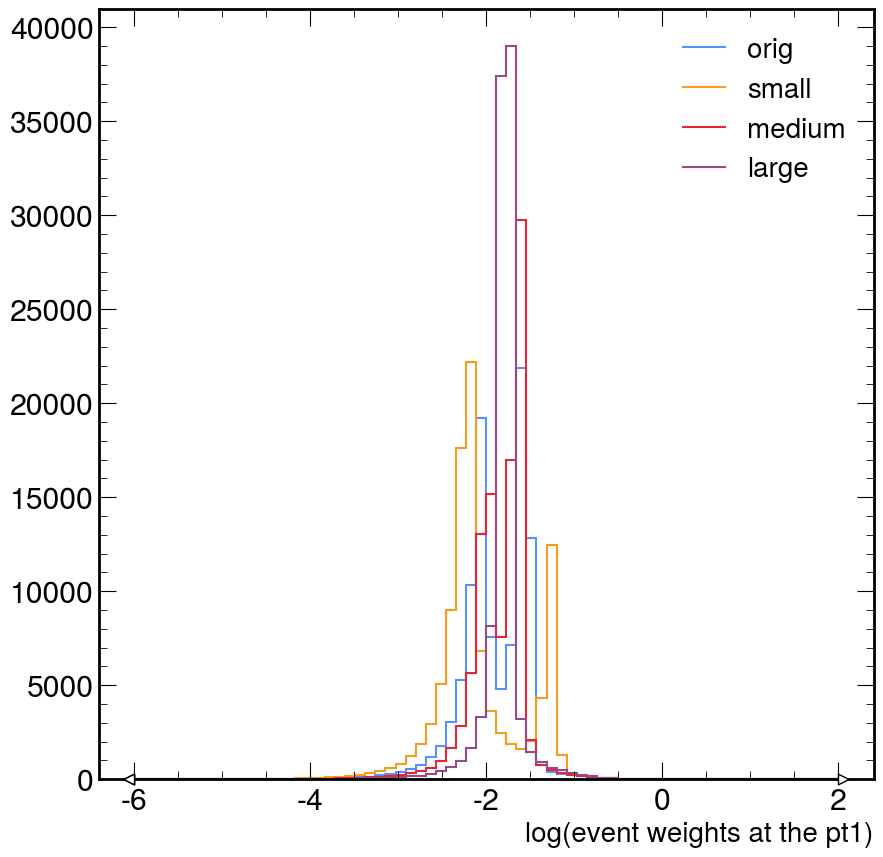

In [9]:
key = 'weights_pt1_log'
fig, ax = plt.subplots()
hists_orig[key].plot1d(ax=ax, stack=False, yerr=False, label="orig")
hists_small[key].plot1d(ax=ax, stack=False, yerr=False, label="small")
hists_medium[key].plot1d(ax=ax, stack=False, yerr=False, label="medium")
hists_large[key].plot1d(ax=ax, stack=False, yerr=False, label="large")
ax.legend(loc='upper right')

fig.savefig(os.path.join(outpath, f"{key}.pdf"))

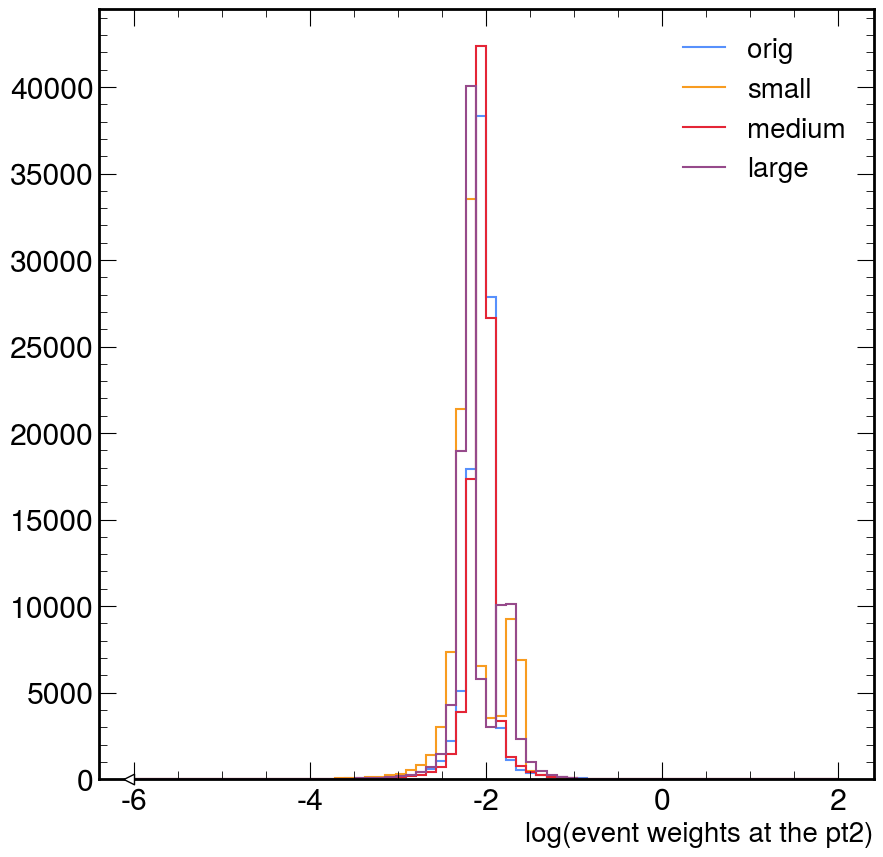

In [16]:
key = 'weights_pt2_log'
fig, ax = plt.subplots()
hists_orig[key].plot1d(ax=ax, stack=False, yerr=False, label="orig")
hists_small[key].plot1d(ax=ax, stack=False, yerr=False, label="small")
hists_medium[key].plot1d(ax=ax, stack=False, yerr=False, label="medium")
hists_large[key].plot1d(ax=ax, stack=False, yerr=False, label="large")
ax.legend(loc='upper right')

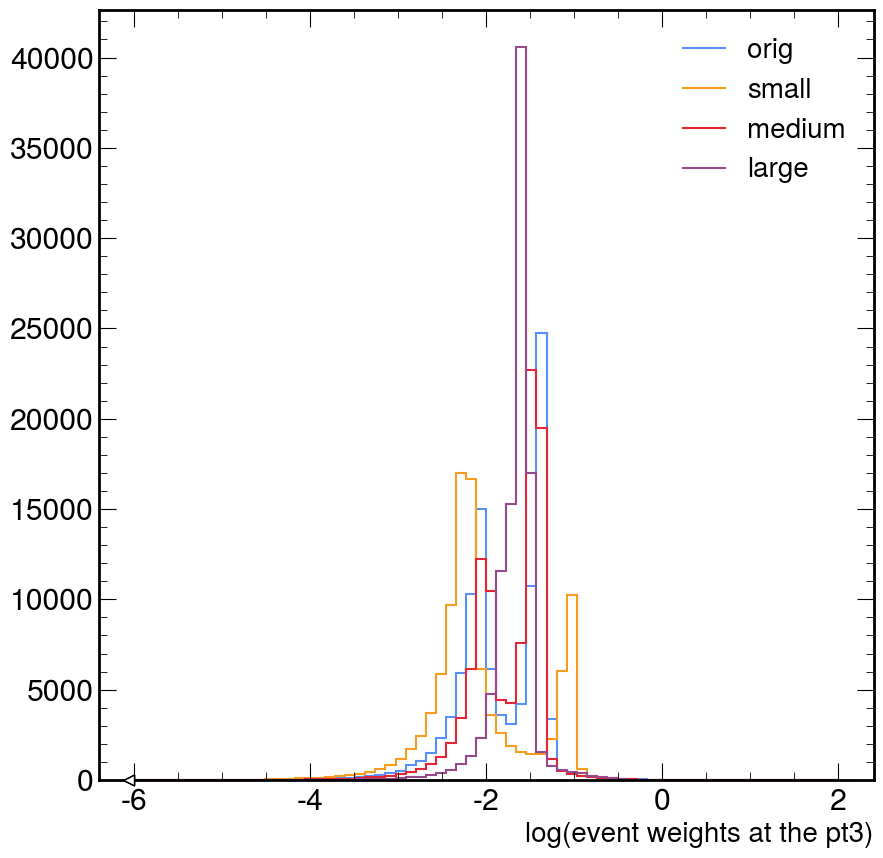

In [10]:
key = 'weights_pt3_log'
fig, ax = plt.subplots()
hists_orig[key].plot1d(ax=ax, stack=False, yerr=False, label="orig")
hists_small[key].plot1d(ax=ax, stack=False, yerr=False, label="small")
hists_medium[key].plot1d(ax=ax, stack=False, yerr=False, label="medium")
hists_large[key].plot1d(ax=ax, stack=False, yerr=False, label="large")
ax.legend(loc='upper right')
fig.savefig(os.path.join(outpath, f"{key}.pdf"))

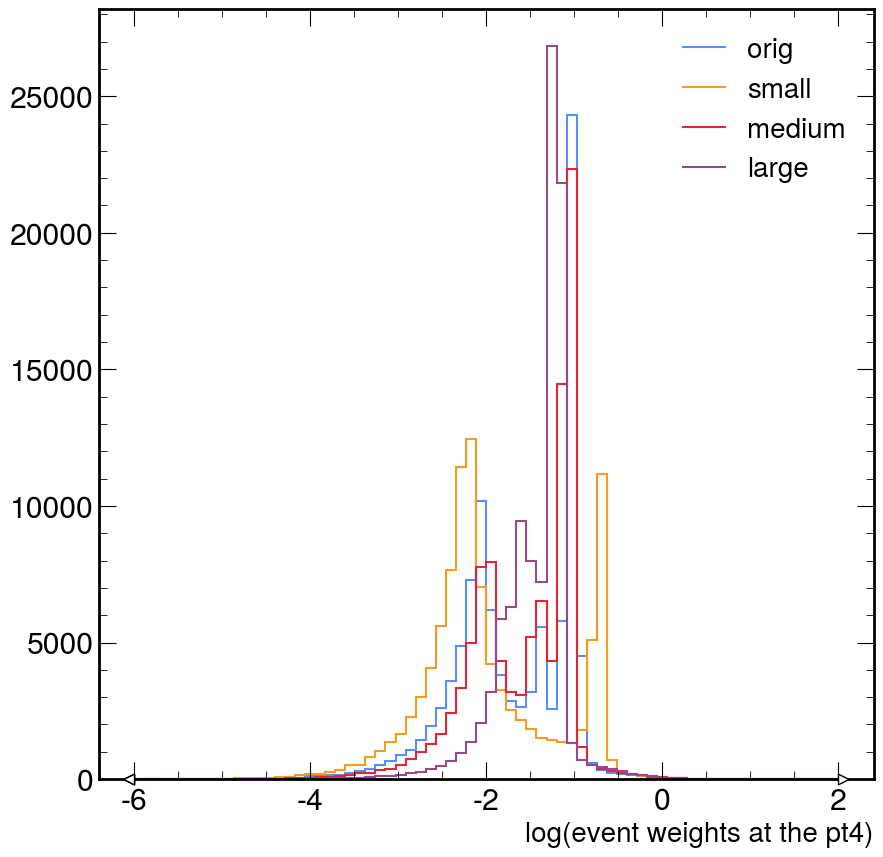

In [11]:
key = 'weights_pt4_log'
fig, ax = plt.subplots()
hists_orig[key].plot1d(ax=ax, stack=False, yerr=False, label="orig")
hists_small[key].plot1d(ax=ax, stack=False, yerr=False, label="small")
hists_medium[key].plot1d(ax=ax, stack=False, yerr=False, label="medium")
hists_large[key].plot1d(ax=ax, stack=False, yerr=False, label="large")
ax.legend(loc='upper right')
fig.savefig(os.path.join(outpath, f"{key}.pdf"))

# 1D Quad EFT Parameterization Plots

In [75]:
import plotting_tools_histEFT as plotTools
import os

In [71]:
standAlone = plotTools.read_MGstandalone_txt("/afs/crc.nd.edu/user/h/hnelson2/mc_production/standAloneMG/tW_frozen_xsec.txt")

In [15]:
gridpack = plotTools.read_MGstandalone_txt("/afs/crc.nd.edu/user/h/hnelson2/mc_production/standAloneMG/tW_gridpack_xsec.txt")

In [19]:
def make_scatter_list_oneWC(scatter_dict, norm, norm_uncert):
	'''
	scatter_dict must be a single entry dictionary, with only the information for a single WC
	'''
	scatter_xvals = scatter_dict[0]
	scatter_yvals = np.divide(np.array(scatter_dict[1]), norm)
	scatter_sigma = np.array(scatter_dict[2])
	sigma_y = np.multiply(scatter_yvals, (np.sqrt(np.add(np.square(np.divide(scatter_sigma, scatter_dict[1])),np.square(np.divide(norm_uncert, norm))))))

	return [scatter_xvals, scatter_yvals, sigma_y]

In [66]:
def make_samples_dict(file, wc_name, sample_names=None, hist_name='sow_norm', wc_max=6.0):
	
    samples = {}

    # for fname in files: 
    #     if sample_names is not None:
    #         label = sample_names[fname]
    #     elif fname.endswith('.pkl.gz'):
    #         label = fname[:-7]
    #     else: 
    #         label = fname

    if wc_name == 'ctGRe' or wc_name == 'ctGIm':
        wc_range = np.arange(-1.5, 1.5, 0.2)
    else:
        wc_range = np.arange(-wc_max, wc_max+0.5, 0.5)
    h = plotTools.get_single_hist(file, hist_name)
    norm = h.as_hist({}).values()[0] #get SM xsec of the sample and use this for normalization
    weights = plotTools.calc_sow_array(h, wc_range, wc_name)

    if norm != 1.0:
        weights[1] = np.divide(weights[1], norm)

    # samples[label] = weights

    # return samples
    return weights

## Checking that my histEFT function returns the correct values for reweighted xsecs

In [58]:
small_sow_dict = make_samples_dict(file="../tW_small_sow.pkl.gz", wc_name='ctGRe', wc_max=1.0)
small_sow_hists = utils.get_hist_from_pkl("../tW_small_sow.pkl.gz", allow_empty=False)
sow_SM_xsec = small_sow_hists['sow_norm'].as_hist({}).values()[0]

In [59]:
h = small_sow_hists['sow_norm']
wc = 'ctGRe'
norm = 6.02563848
vals = []
for i in [-1.0, -0.7, -0.4, -0.2, 0.2, 0.4, 0.7, 1.0]:
    h_tmp = h.as_hist({wc:i})
    # print(f"ctGRe = {i} : xsec = {h_tmp.values()[0]/norm}")
    vals.append(h_tmp.values()[0]/norm)

In [60]:
standalone_dict = make_scatter_list_oneWC(standAlone[wc], 5.63, 0.01903)

Text(1, 0, 'ctGRe')

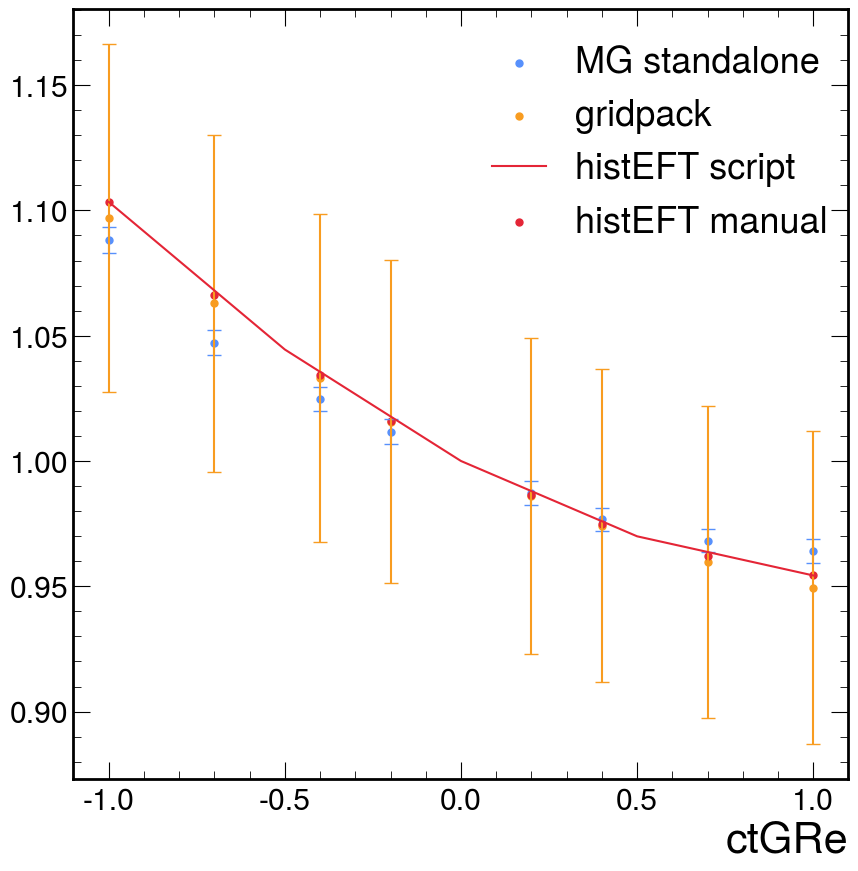

In [110]:
wc = 'ctGRe'

standalone_dict = make_scatter_list_oneWC(standAlone[wc], 5.63, 0.01903)
gridpack_dict = make_scatter_list_oneWC(gridpack[wc], 5.92199011614, 0.266680304541)

fig, ax = plt.subplots()
ax.scatter(standalone_dict[0], standalone_dict[1], label = "MG standalone")
ax.errorbar(standalone_dict[0], standalone_dict[1], yerr = standalone_dict[2], xerr = None, capsize=5, ls='none')
ax.scatter(gridpack_dict[0], gridpack_dict[1], label = "gridpack")
ax.errorbar(gridpack_dict[0], gridpack_dict[1], yerr = gridpack_dict[2], xerr = None, capsize=5, ls='none')

ax.plot(small_sow_dict[0], small_sow_dict[1], label="histEFT script")
ax.scatter([-1.0, -0.7, -0.4, -0.2, 0.2, 0.4, 0.7, 1.0], vals, label="histEFT manual")

ax.legend(loc='best', bbox_to_anchor=(1.02, 1.0), fontsize='medium')
ax.set_xlabel(wc, fontsize = 'large')

## Comparing calculated vs reweighted xsecs

In [90]:
fname = "../tW_small_sow.pkl.gz"
savedir = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/1d_quad_small_comp"

In [92]:
for wc in standAlone.keys():

    histEFT_dict = make_samples_dict(file=fname, wc_name=wc, wc_max=10.0)
    standalone_dict = make_scatter_list_oneWC(standAlone[wc], 5.63, 0.01903)
    gridpack_dict = make_scatter_list_oneWC(gridpack[wc], 5.92199011614, 0.266680304541)
    
    fig, ax = plt.subplots()
    ax.scatter(standalone_dict[0], standalone_dict[1], label = "MG standalone")
    ax.errorbar(standalone_dict[0], standalone_dict[1], yerr = standalone_dict[2], xerr = None, capsize=5, ls='none')
    ax.scatter(gridpack_dict[0], gridpack_dict[1], label = "gridpack")
    ax.errorbar(gridpack_dict[0], gridpack_dict[1], yerr = gridpack_dict[2], xerr = None, capsize=5, ls='none')

    ax.plot(histEFT_dict[0], histEFT_dict[1], label="histEFT")

    ax.legend(loc='best', bbox_to_anchor=(1.02, 0.5), fontsize='medium')
    ax.set_xlabel(wc, fontsize = 'large')
    figname = f"quad1d_comp_{wc}.pdf"
    fig.savefig(os.path.join(savedir,figname), bbox_inches='tight')
    print(f"saving plot to {os.path.join(savedir, figname)}")
    plt.close(fig)